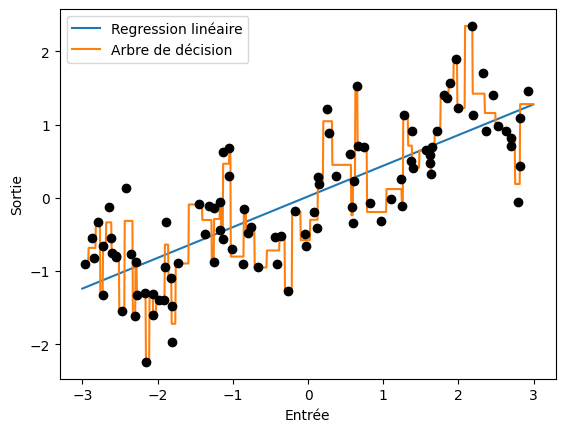

In [6]:
%matplotlib inline
# Les modèles de régression linéaire et d'arbre de décision sont souvent dépendants de la manière
# dont est structurée l'ensemble des données

# Exemple sur un jeu brut

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn
import numpy as np
import matplotlib.pyplot as plt

X,y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), label="Regression linéaire")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line, reg.predict(line), label="Arbre de décision")

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Sortie")
plt.xlabel("Entrée")
plt.legend(loc="best")

In [17]:
# La regression linéaire ne peut saisir que des lignes. On discrétise le problème en séparant la ligne représentant
# les valeurs en entrée par un ensemble de segment.
# On redimensionne ainsi le problème à autant de caractéristiques que de dimensions en utilisant un encodage OneHot

bins = np.linspace(-3,3,11)
print("10 bacs entre -3 et 3 : {}".format(bins))

which_bin = np.digitize(X, bins=bins)
print("\nLes points {}".format( (X[:5]).reshape(5)))
print("sont répartis dans {}".format((which_bin[:5]).reshape(5)))

10 bacs entre -3 et 3 : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Les points [-0.75275929  2.70428584  1.39196365  0.59195091 -2.06388816]
sont répartis dans [ 4 10  8  6  2]


In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print("Mutidimensionnalité des 5 points précédents via HotOne :\n{}".format(X_binned[:5]))

Mutidimensionnalité des 5 points précédents via HotOne :
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


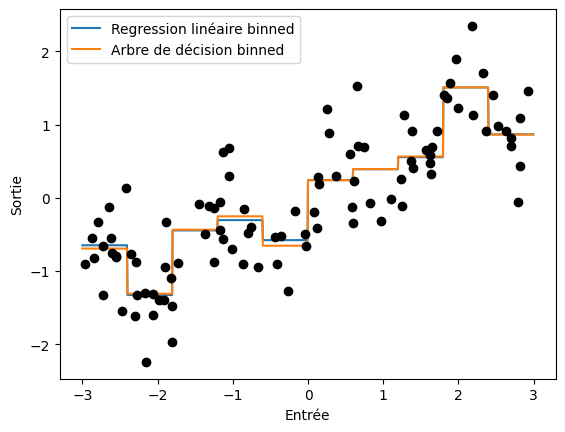

In [24]:
# Application des modèles de régression et d'arbre de décision à la nouvelle structure

line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Regression linéaire binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line,reg.predict(line_binned),label="Arbre de décision binned")

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Sortie")
plt.xlabel("Entrée")
plt.legend(loc="best")

# Les deux modèles prédisent de manière supperposée une même valeur pour un même segment.
# La régression linéaire est devenue plus flexible. L'arbre de décision plus rigide.

Shape : (100, 11)


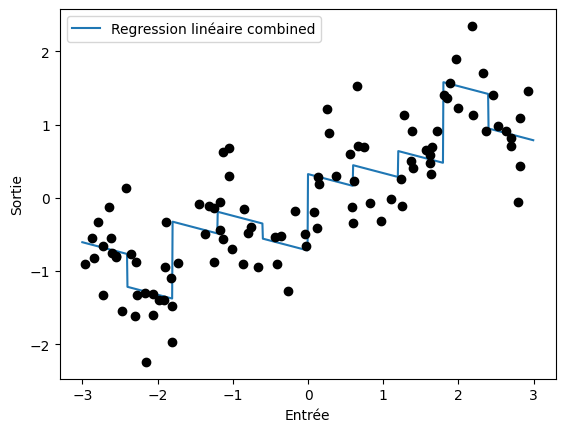

In [29]:
# On peut ajouter une notion de couplage entre les dimensions artificiellement crées du problème et la dimension
# initiale en la réintroduisant

X_combined = np.hstack([X, X_binned])
print("Shape : {}".format(X_combined.shape))

reg = LinearRegression().fit(X_combined,y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="Regression linéaire combined")

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Sortie")
plt.xlabel("Entrée")
plt.legend(loc="best")

# Le modèle capte l'influence de la caractéristique ajoutée globalement, de la même manière sur tous les intervalles
# indistinctement.

Shape : (100, 20)


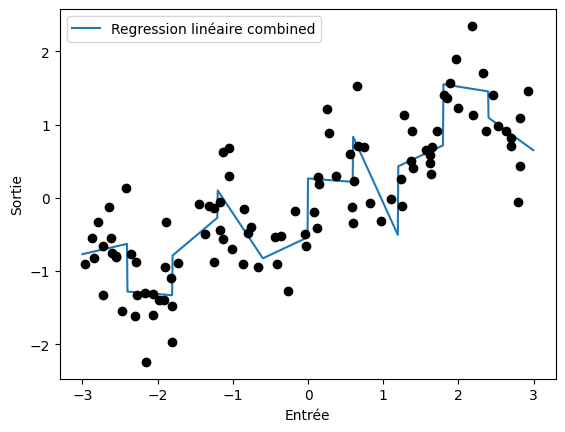

In [34]:
# On peut améliorer le focus en couplant la caractéristique au segment considéré via un produit.

X_combined = np.hstack([X_binned, X_binned * X])
print("Shape : {}".format(X_combined.shape))

reg = LinearRegression().fit(X_combined,y)
line_combined = np.hstack([line_binned, line_binned * line])
plt.plot(line, reg.predict(line_combined), label="Regression linéaire combined")

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Sortie")
plt.xlabel("Entrée")

plt.legend(loc="best")

# L'ajout des caractéristiques couplées permet d'avoir une pente en rapport du segment.

In [41]:
# On peut également utiliser des polynômes pour étendre une caractéristique continue : on prend la valeur de
# la caractéristique initiale et on la transforme en valeur polynomiale.
# X =====> X^1 + X^2 + X^3 ...
# Soit autant de caracteristique que de monômes de degrès différents

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print("Shape X_poly {}".format(X_poly.shape))

print("\nEntrées de 5 valeurs : \n{}".format(X_poly[:5]))

print("\nNom des caractéristiques : {}".format(poly.get_feature_names_out()))

Shape X_poly (100, 10)

Entrées de 5 valeurs : 
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]

Nom des caractéristiques : ['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


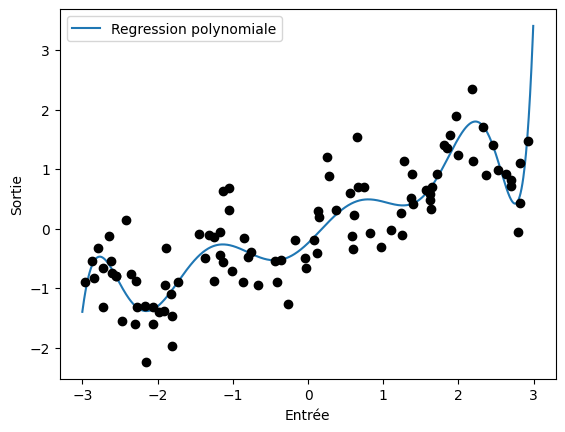

In [44]:
# Appliquer un modèle de régression linéaire sur un ensemble de données polynomial revient à effectuer un 
# modèle de régression polynomiale

reg = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label="Regression polynomiale")

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Sortie")
plt.xlabel("Entrée")

plt.legend(loc="best")


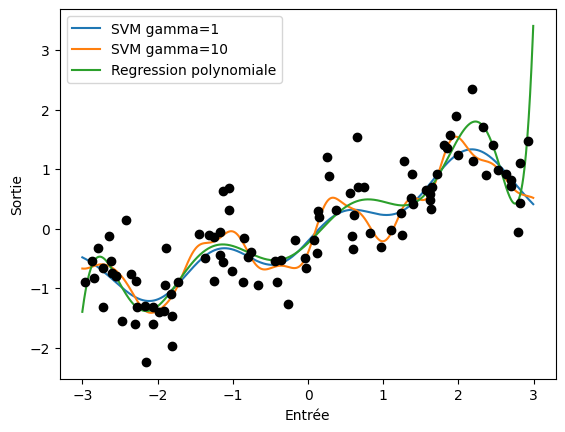

In [46]:
# Comparaison entre une régression polynomiale et un SVM
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line), label="SVM gamma={}".format(gamma))
    
plt.plot(line, reg.predict(line_poly), label="Regression polynomiale")

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel("Sortie")
plt.xlabel("Entrée")

plt.legend(loc="best")

# On obtient des résultats similaires avec un classificateur SVM sans modification de l'ensemble de caractéristique
# initial sauf pour les extrêmes.

In [50]:
# En appliquant la transformation polynomiale aux données housing california 
# Le jeu boston a été supprimé par les maintainers de sklearn (essayer de l'importer pour voir)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

housing = fetch_california_housing()
X_train,X_test,y_train,y_test = train_test_split(housing.data, housing.target, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 8 caractéristiques
print("X_train.shape {}".format(X_train.shape))

# Les caractéristiques de base sont multiplitées entre elles : 8 + S(1->8) + 1 = 8 + 8*9/2 + 1 = 8 + 36 + 1 = 45
print("X_train_poly.shape {}".format(X_train_poly.shape))

X_train.shape (15480, 8)
X_train_poly.shape (15480, 45)


In [52]:
print("Caractéristiques polynomiales : \n{}".format(poly.get_feature_names_out()))

Caractéristiques polynomiales : 
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4'
 'x1 x5' 'x1 x6' 'x1 x7' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7'
 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x5^2' 'x5 x6' 'x5 x7' 'x6^2' 'x6 x7' 'x7^2']


In [56]:
# Comparaison des scores d'une régression ridge avec et sans modifications des entrées

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score sans modifications : {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score avec modifications : {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score sans modifications : 0.584
Score avec modifications : 0.605


In [58]:
# Comparaison des scores d'une forêt aléatoire avec et sans modifications des entrées

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score sans modifications : {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score avec modifications : {:.3f}".format(rf.score(X_test_poly, y_test)))

Score sans modifications : 0.793
Score avec modifications : 0.808
